In [ ]:
https://arxiv.org/pdf/1412.6806.pdf #Research paper for in-depth understanding of the ALL COnvolutional Neural Network(ICLR 2015)
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130
# Advances and results achieved in CIFAR 10 Data set consists of 32x32 color images of 10 classes, 50000 train and 10000 test

In [41]:
import sys
import numpy
import pandas
import matplotlib
import keras
import theano
%matplotlib inline
print('Python :{}'.format(sys.version))
print('Pandas :{}'.format(pandas.__version__))
print('Numpy :{}'.format(numpy.__version__))
print('Keras :{}'.format(keras.__version__))
print('Matplotlib :{}'.format(matplotlib.__version__))

Python :3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
Pandas :0.23.4
Numpy :1.15.2
Keras :2.2.4
Matplotlib :3.0.0


In [52]:
# Importing Libraries and the CIFAR-10 Dataset already present in Keras as a standard Dataset for Object Recognition

from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 
from scipy.misc import toimage

In [3]:
# Loading the imported data from keras
(X_train,y_train),(X_test,y_test) = cifar10.load_data()  # in brackets and not usual because return type is 2 tuples >https://keras.io/datasets/

In [4]:
# Exploring the Dataset to expand the idea we have about the dataset
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
# Observe as said before 50k training and 10k testing imgaes, 3 channels as RGB images and size 32x32

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
# For a single image to check if the format is unusual or rightly defined, size,size,channels
print(X_train[0].shape)
# Observation- perfect dimenesion and shape, if not correct we may have to transpose to get to usable format 

(32, 32, 3)


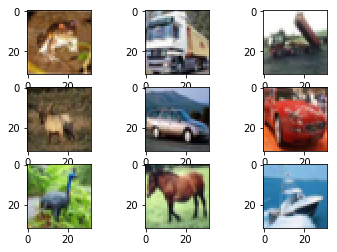

In [27]:
# Unusual format as channels(3) is reported first, before size, thus we need to transpose it and then work with it
# creating a grid of 3x3 images to see what these images look like using pyplot and subplots
for i in range(0,9):
    axis=plt.subplot(330 + 1 +i)              # 330 means 3 by 3 and position, thus first time 3 by 3 subplot position 1 and so on
    img=X_train[i]  
    #img = img.transpose([1,2,0]) #.transpose([1,2,0]) if they were in the unusual format,this flips all the channels around as needed
    plt.imshow(img)
    
plt.show()
#print(X_train[0])
# Fact- Human accuracy is 94%, let's see what we can get

In [7]:
# Preprocessing the data to use it,from normalization to one hot encoding

# Fixing random seed for reproducability
seed = 6
np.random.seed(seed)

# Loading once again finally
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

# Normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') # To convert it to float values
X_test = X_test.astype('float32')

X_train = X_train / 255.0  # Why dividing by 255 ( since 8 bit numbers all the RGB colors) thus, 8*8*8 (256-1) =255
X_test = X_test / 255.0      # https://stackoverflow.com/questions/20486700/why-we-always-divide-rgb-values-by-255

In [8]:
print(X_train[0])
# We observe they have been normalized

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
# Looking at class labels shape
print(y_train.shape)
print(y_train[0])
print(len(np.unique(y_train)))
# 50k values of length 1
# 6 is the category they belong to
# No of unique classes =10

(50000, 1)
[6]
10


In [10]:
# One hot encoding = [6] = [0,0,0,0,0,0,1,0,0,0]
# Converting to a single list of length 10 (0-9) for all the classes
# Hot Encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_of_classes = y_test.shape[1]
print(num_of_classes)

print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# BUILDING the CNN 
# The 3rd model we want to implement ALL CNN 
Model-C
Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax


In [13]:
# Importing libraries for layers ( Each bullet point above is a layer)
from keras.models import Sequential
from keras.layers import Dropout # Using it for regularization to avoid overfitting, a common problem in Neural Networks
from keras.layers import Activation,Conv2D,GlobalAveragePooling2D # Conv2D is the main convolutional layer
from keras.optimizers import SGD # Stochastic Gradient Descent

In [14]:
# Defining the model function-

def allcnn(weights = None):
    # Defining model type - Sequential
    model = Sequential()
    # adding layers
    model.add(Conv2D(96,(3,3),padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))  # Very important as help resolve overfitting
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding = 'valid')) # Understand various types of padding
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding = 'valid'))
    
    # Add global average pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # Load the weights
    if weights:
        model.load_weights(weights)   # This means weights would be default initially but we can transfer weights later if we decide
                                  # or create such a scenario
    # Returning the model
    return model


In [15]:
# Defining the hyper parameters for the CNN
learning_rate = 0.01   # How frequently we wish to change the weights
weight_decay = 1e-6    
momentum = 0.9          

# Building the model
model = allcnn()

# Define the optimizer and compile the model
sgd=SGD(lr=learning_rate , momentum = momentum , decay = weight_decay , nesterov = True)
model.compile(loss='categorical_crossentropy' ,optimizer = sgd , metrics = ['accuracy'])

# Print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [ ]:
# Additional training parameters defined-
epochs = 350
batch_size = 32 #Weights updated after every 32 images

# Fitting the model
model.fit(X_train,y_train,validation_data = (X_test,y_test) , epochs=epochs , batch_size=batch_size,verbose = 1)

# Well, On the CPU, this is going to take a loooooong time! Thus, let's try something else
Uh oh. It's apparent that training this deep convolutional neural network is going to take a long time, which is not surprising considering the network has about 1.3 million parameters. Updating this many parameters takes a considerable amount of time; unless, of course, you are using a Graphics Processing Unit (GPU). This is a good time for a quick lesson on the differences between CPUs and GPUs.

* The central processing unit (CPU) is often called the brains of the PC because it handles the majority of necessary computations. All computers have a CPU and this is what Keras and Theano automatically utilize.

* The graphics processing unit (GPU) is in charge of image rendering. The most advanced GPUs were originally designed for gamers; however, GPU-accelerated computing, the use of a GPU together with a CPU to accelarate deep learing, analytics, and engineering applications, has become increasingly common. In fact, the training of deep neural networks is not realistic without them.

The most common GPUs for deep learning are produced by NVIDIA. Furthermore, the NVIDIA Deep Learning SDK provides high-performance tools and libraries to power GPU-accelerated machine learning applications. An alternative would be an AMD GPU in combination with the OpenCL libraries; however, these libraries have fewer active users and less support than the NVIDIA libraries.

If your computer has an NVIDIA GPU, installing the CUDA Drivers and CUDA Tookit from NVIDIA will allow Theano and Keras to utilize GPU-accelerated computing. The original paper mentions that it took approximately 10 hours to train the All-CNN network for 350 epochs using a modern GPU, which is considerably faster (several orders of magnitude) than it would take to train on CPU.

If you haven't already, stop the cell above. In the following cells, we'll save some time by loading pre-trained weights for the All-CNN network. Using these weights, we can evaluate the performance of the All-CNN network on the testing dataset.

In [16]:
# Looking at how we can load pre-trained weights above and use them as leverage
# Copied from above-, also we can use pre-trained weights seaching for 
# best trained weights for all cnn model on cifar10 dataset > github link > https://github.com/PAN001/All-CNN/blob/master/all_cnn_weights_0.9088_0.4994.hdf5

# Defining the hyper parameters for the CNN
learning_rate = 0.01   # How frequently we wish to change the weights
weight_decay = 1e-6    
momentum = 0.9          

# Building the model and defining the weights pre-loaded
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# Define the optimizer and compile the model
sgd=SGD(lr=learning_rate , momentum = momentum , decay = weight_decay , nesterov = True)
model.compile(loss='categorical_crossentropy' ,optimizer = sgd , metrics = ['accuracy'])

# Print model summary
print(model.summary())

# Testing the model with pretrained weights
scores = model.evaluate(X_test,y_test,verbose = 1)
print('Accuracy:{}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [ ]:
# Data Augmentation- changing the data to help model generalize the weights, example rotation, blurring, adding noise, e.t.c

In [17]:
# Making the Predictions defining the dictinary of class labels and names
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Zipping to a dictionary
class_labels = dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [18]:
# Gereating a batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109],axis = -1)

# Making predictions
predictions = model.predict(batch , verbose = 1)

9/9 [==============================] - 0s 17ms/step


In [19]:
# Printing thhe predictions
print(predictions)
# From the softmax activation, these are probability values for each class for  every image, looking at the shape
predictions.shape

[[4.56472300e-18 1.05810246e-20 1.89234586e-10 2.14116086e-11
  9.99999285e-01 2.80374707e-07 3.14789075e-13 4.23810434e-07
  1.36995572e-19 1.20970667e-18]
 [2.11908215e-16 2.03863923e-17 1.56725277e-09 5.35813570e-07
  1.62561714e-10 9.99999404e-01 1.67123959e-09 2.07823874e-08
  3.65480529e-15 3.51285977e-16]
 [1.27203225e-30 5.02730693e-28 5.15396277e-24 3.60512695e-21
  1.08750571e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19241431e-32 1.22742394e-23]
 [1.51438863e-16 4.76694219e-18 2.25839103e-09 1.00000000e+00
  4.34816280e-11 1.68842750e-12 4.53172954e-13 2.66873612e-16
  7.26597053e-19 6.20511257e-17]
 [8.24992055e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35630438e-36
  8.68653086e-30 8.21906932e-22]
 [5.96997311e-24 1.00000000e+00 7.54841125e-27 8.02283790e-27
  1.97139506e-30 2.73387140e-29 7.21868354e-31 5.56799443e-27
  1.61867448e-26 1.19061960e-13]
 [6.45632997e-18 2.96424244e-20 1.00464949e-11 9.99999881e

(9, 10)

In [57]:
# To prove these are class probabilities their sum must equal 1, checking

for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [58]:
# np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions, axis =-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


In [63]:
print(batch.shape)

(9, 32, 32, 3)


/home/pranjal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


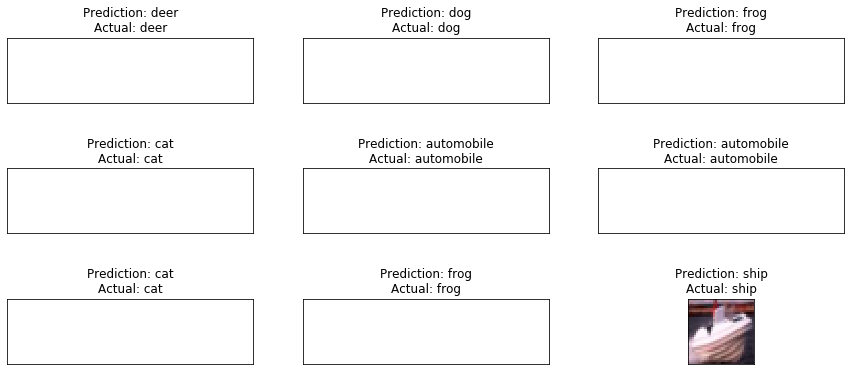

In [65]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
#%matplotlib inline
from scipy.misc import toimage

for i, img in enumerate(batch):
    #img = img.transpose([1,2,0])
    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    
plt.imshow(toimage(img))
plt.show()